<a href="https://colab.research.google.com/github/2yeonsong/MachineLearning/blob/main/6_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2023-10-30 01:28:12--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2023-10-30 01:28:12--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2023-10-30 01:28:13--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... conne

In [ ]:
# 특성이 많으면
# 장점 : 선형모델의 성능이 높아짐
# 단점 : 훈련 데이터에 쉽게 과대적합됨, 데이터 용량이 급격히 증가하여 저장 공간이 부족, 모델 처리 속도가 떨어짐

In [ ]:
# 주성분 분석
# 대표적인 차원 축소 알고리즘
# 데이터에 있는 분산이 큰 방향을 찾는 것
# 분산은 데이터가 널리 퍼져있는 정도
# 분산이 큰 방향이랑 데이터를 잘 표현하는 어떤 벡터(데이터를 표현하는데 적합)

In [ ]:
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(fruits_2d)

print(pca.components_.shape)

(50, 10000)


In [ ]:
# n_components : 주성분의 개수를 지정하는데 필수로 사용해야하는 매개변수
# 주의할 점 : 주성분 벡터의 크기는 원본 데이터와 동일함

In [ ]:
# 주성분 이미지 출력하기
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)    # n은 샘플 개수입니다
    # 한 줄에 10개씩 이미지를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산합니다.
    rows = int(np.ceil(n/10))
    # 행이 1개 이면 열 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols,
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n 개까지만 그립니다.
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

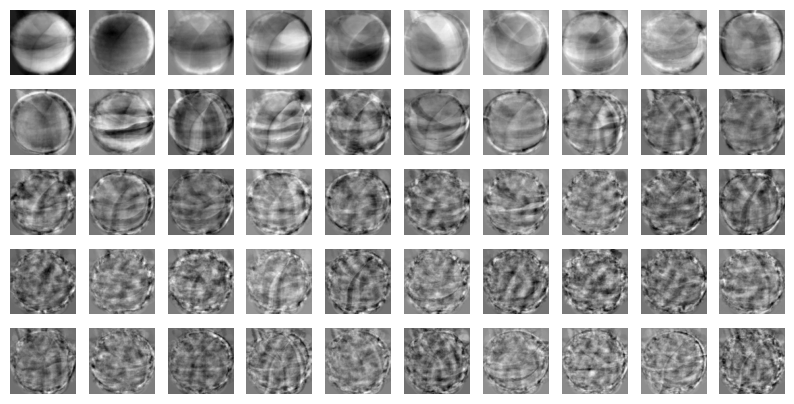

In [14]:
# 원본 데이터에서 가장 분산이 큰 방향을 순서대로 나타냄
# 데이터 세트에 있는 어떤 특징을 잡아낸 것으로 생각할 수 있음
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [16]:
# 찾아낸 주성분을 이용하여 원본 데이터의 특성을 50으로 줄여보자
print(fruits_2d.shape)
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)
# 10000개의 특성이 50개로 줄었음

(300, 10000)
(300, 50)


In [17]:
# 원본 데이터 재구성
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


In [18]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


In [20]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)

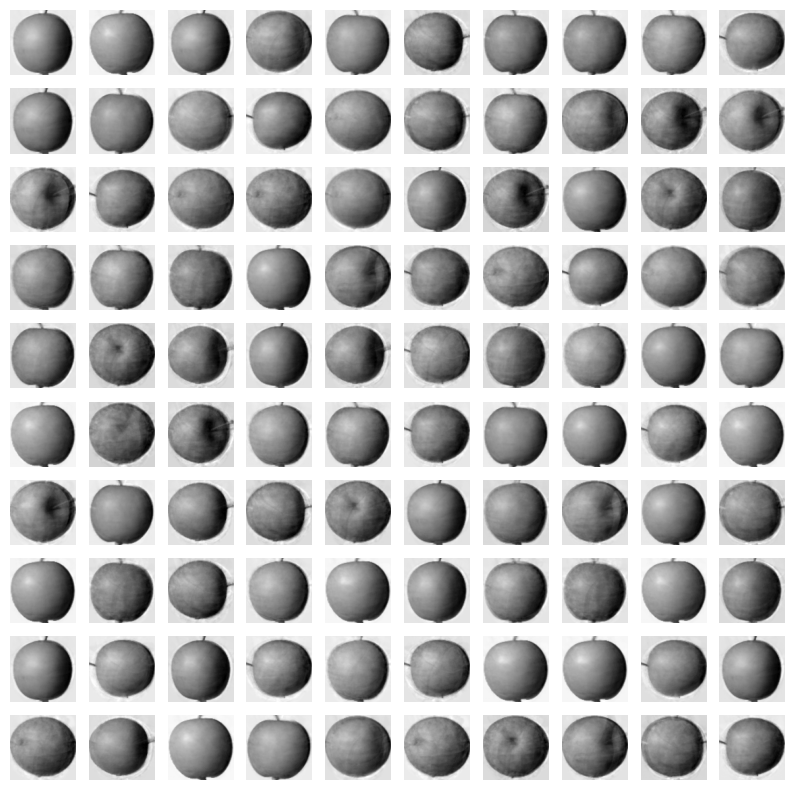

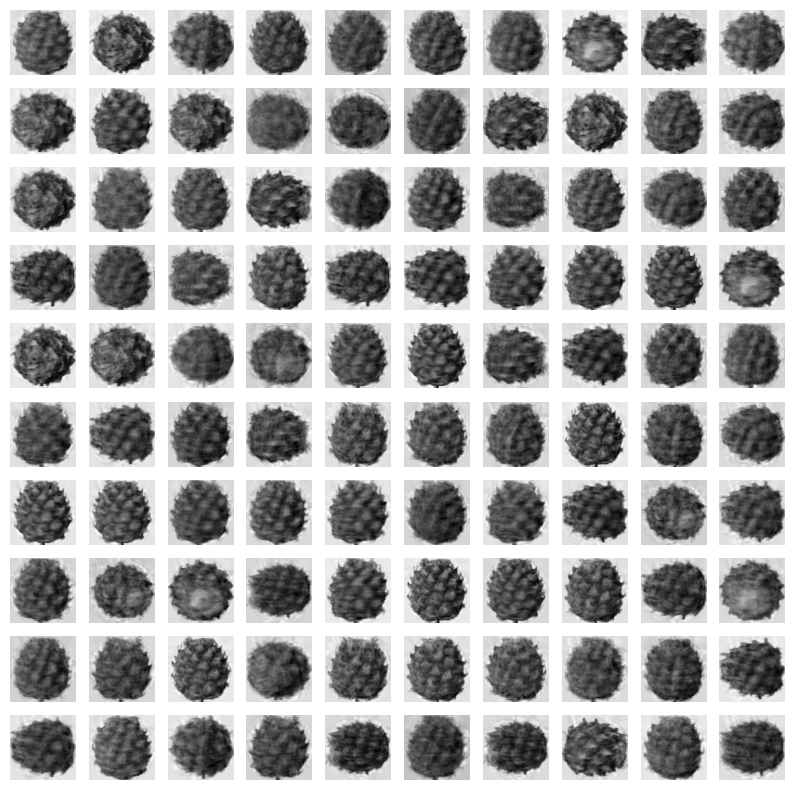

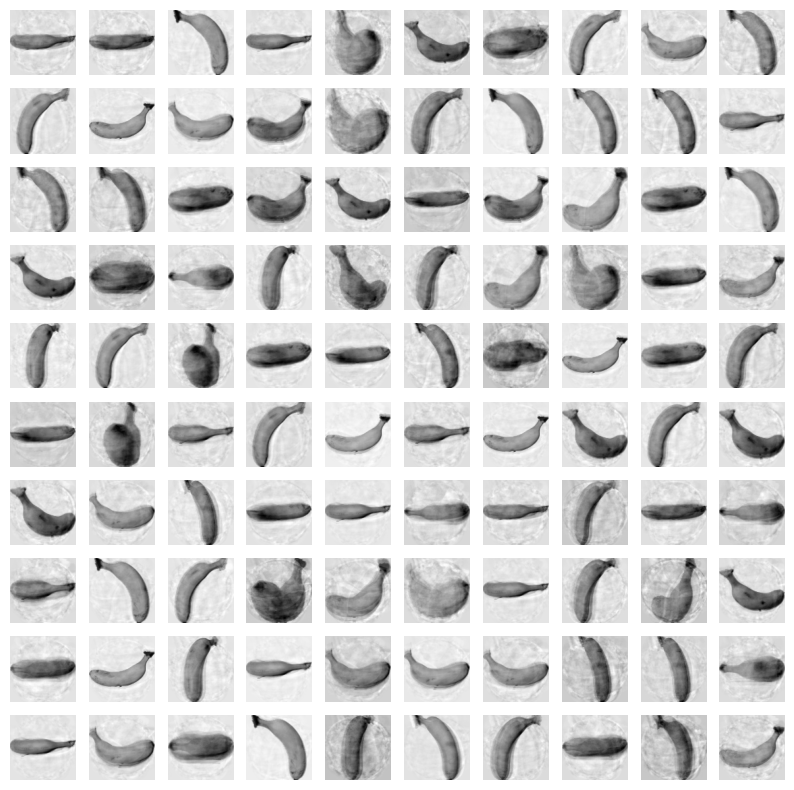

In [21]:
# 위와 같이 하면 손실이 발생 할 수 있음
# 손실이 발생한것을 그림으로 확인하기
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")

0.9214799072404527


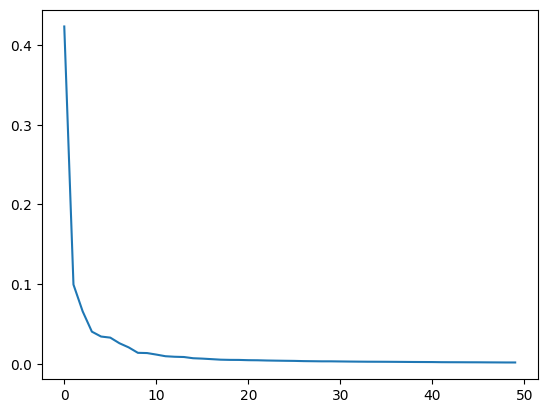

In [22]:
# 설명된 분산
# 주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값
# 이 분산 비율을 모두 더하면 50개의 주성분으로 표현되고 있는 충분한 비율을 얻을 수 있음
print(np.sum(pca.explained_variance_ratio_))
plt.plot(pca.explained_variance_ratio_)

In [26]:
# 과일 사진 원본 데이터와 PCA로 축소한 데이터를 지도 학습에 적용하고 차이를 찾아보자
# 3개의 과일 사진을 분류해야 하므로 로지스틱 회귀 모델을 사용해봄
# 지도 학습 모델이므로 타깃값을 설정
# 사과=0. 파인애플=1, 바나나=2
# 다른 알고리즘과 함께 사용하기
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

target = np.array([0] * 100 + [1] * 100 + [2] * 100)

In [28]:
from sklearn.model_selection import cross_validate

scores = cross_validate(lr, fruits_2d, target)

# 정확도
print(np.mean(scores['test_score']))

# 몇 초 걸리는지
print(np.mean(scores['fit_time']))

0.9966666666666667
1.7205702304840087


In [44]:
# PCA로 축소한 fruits_pca 사용
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))

# 이것이! PCA를 사용하는 이유!
# 손실이 발생했지만 효율이 훨씬 좋아서 PCA를 사용 (1.7205702304840087 -> 0.05790352821350098)
print(np.mean(scores['fit_time']))

0.9933333333333334
0.024865341186523438


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [30]:
# PCA로 훈련 데이터의 차원을 축소해 저장 공간뿐만 아니라 머신러닝 모델의 훈련 속도도 높일 수 있음

In [31]:
# 주성분의 개수 대신 분산의 비율로 주성분을 찾을 수 있음
# 설명된 분산의 50%에 달하는 주성분을 찾아보

2
0.5229877245800599


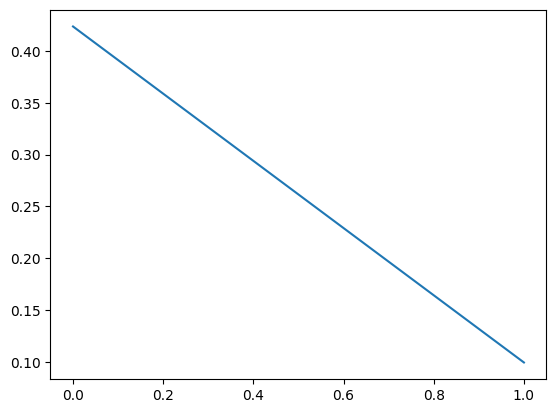

In [35]:
# 이거 좀 다시 봐야겠다!!
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

print(pca.n_components_)
print(np.sum(pca.explained_variance_ratio_))
plt.plot(pca.explained_variance_ratio_)
plt.show()

In [36]:
print(pca.n_components_)

fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

2
(300, 2)


In [43]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)

print(np.unique(km.labels_, return_counts=True))

# 2절에서 원본 데이터를 사용했을 떄와 거의 비슷한 결과임

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


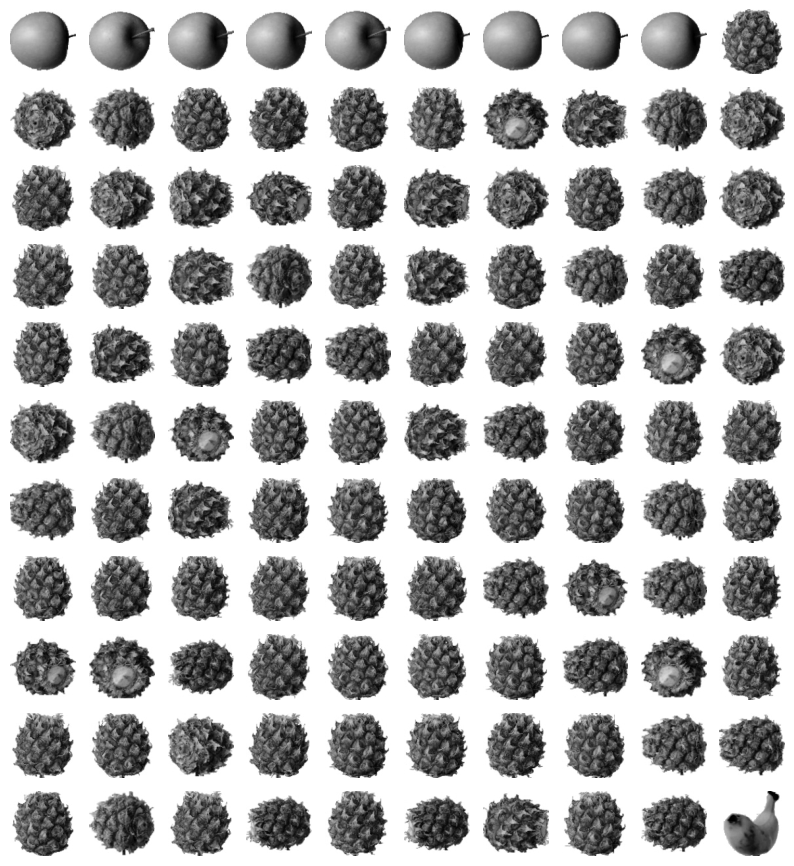

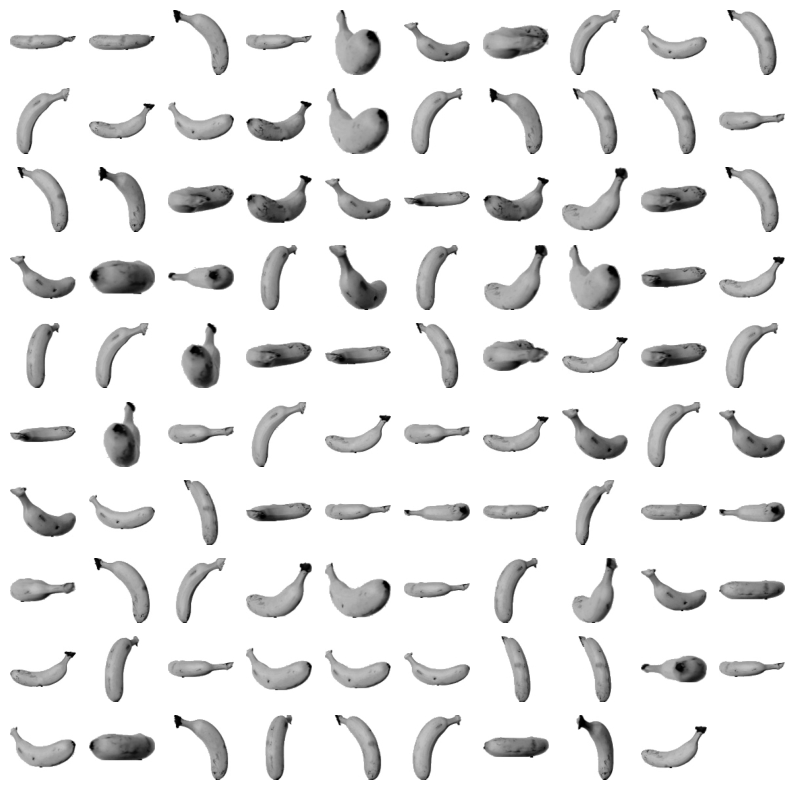

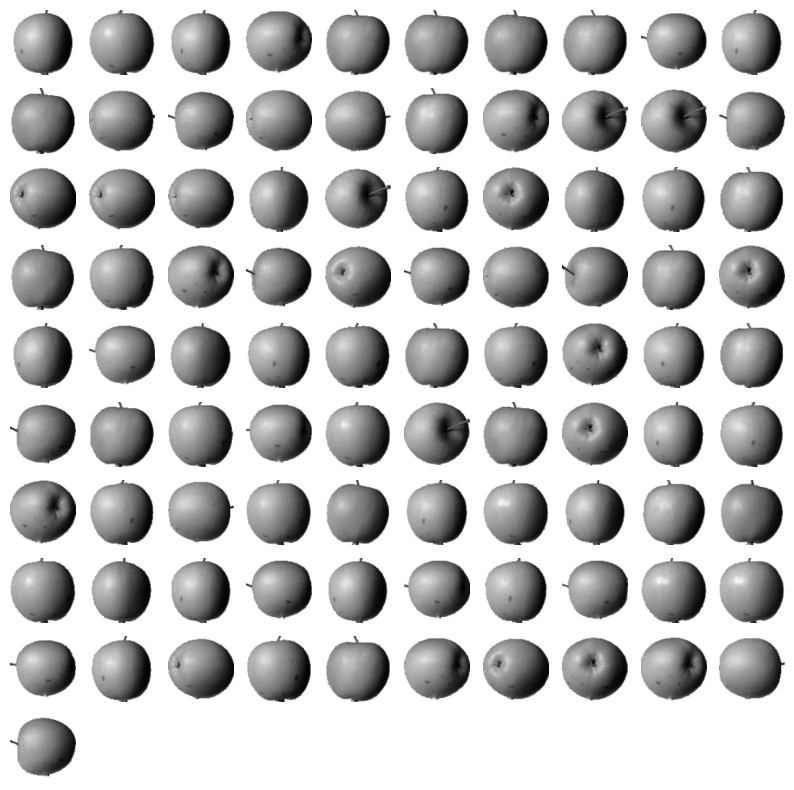

In [40]:
for label in range(0, 3):
    draw_fruits(fruits[km.labels_ == label])
    print("\n")

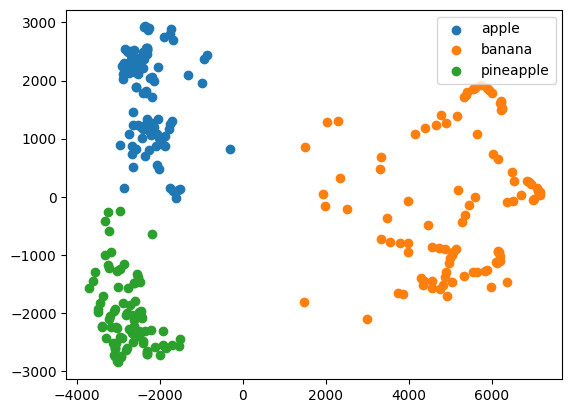

In [41]:
for label in range(0, 3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:,1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()

In [42]:
# 차원 축소 장점 : 과대 적합 억제, 저장 공간 확보, 모델 처리 속도 상승, 모델 성능 상승, 시각화 가능